##### 1ª Passo:

In [63]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [64]:
#Importando os CSVS da pasta dados
df_clientes = pd.read_csv("./dados/clientes.csv")
df_pedidos= pd.read_csv('./dados/pedidos.csv')
df_geolocalizacao= pd.read_csv('./dados/geolocalizacao.csv')
df_itens_pedido= pd.read_csv('./dados/itens_do_pedido.csv')
df_pagamentos=pd.read_csv('./dados/pagamentos_de_pedidos.csv')
df_produto_categoria=pd.read_csv('./dados/produto_categoria.csv')
df_produtos=pd.read_csv('./dados/produtos.csv')
df_revisoes_pedidos=pd.read_csv('./dados/revisoes_pedidos.csv')
df_vendedores=pd.read_csv('./dados/vendedores.csv')


In [65]:
#Para Visualizar os primeiros dados de cada csv
df_clientes.head()
df_pedidos.head()
df_geolocalizacao.head()
df_itens_pedido.head()
df_pagamentos.head()
df_produto_categoria.head()
df_produtos.head()
df_revisoes_pedidos.head()
df_vendedores.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [66]:
#Observar quantas linhas e colunas tem em cada um
df_clientes.shape
df_pedidos.shape
df_geolocalizacao.shape
df_itens_pedido.shape
df_pagamentos.shape
df_produto_categoria.shape
df_produtos.shape
df_revisoes_pedidos.shape
df_vendedores.shape

(3095, 4)

In [67]:
#Tipos de dados, valores nulos
df_clientes.info()
df_pedidos.info()
df_geolocalizacao.info()
df_itens_pedido.info()
df_pagamentos.info()
df_produto_categoria.info()
df_produtos.info()
df_revisoes_pedidos.info()
df_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

In [68]:
#Observar dados faltantes 
df_clientes.isnull().sum()
df_pedidos.isnull().sum()
df_geolocalizacao.isnull().sum()
df_itens_pedido.isnull().sum()
df_pagamentos.isnull().sum()
df_produtos.isnull().sum()
df_revisoes_pedidos.isnull().sum()
df_vendedores.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [69]:
#Remover colunas nulas
df_clientes = df_clientes.dropna()
df_pedidos = df_pedidos.dropna()
df_geolocalizacao = df_geolocalizacao.dropna()
df_itens_pedido = df_itens_pedido.dropna()
df_pagamentos = df_pagamentos.dropna()
df_revisoes_pedidos = df_revisoes_pedidos.dropna()
df_vendedores = df_vendedores.dropna()

#Nesta categoria colocar o valor nulo como 'Desconhecido'
df_produtos['product_category_name'] = df_produtos['product_category_name'].fillna('Desconhecido')




In [70]:
#Removendo duplicatas

#Geolocalização costuma ter duplicatas, múltiplas linhas com o mesmo par de geolocation_lat e geolocation_lng 
#para representar amostragem densa.

df_geolocalizacao.drop_duplicates(subset=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"], inplace=True)


##### 2º Passo:

### Análise Exploratória dos Dados

* Volume de pedidos por mês mais sazonalidade

C:\Users\priscilamaiel\AppData\Local\Temp\ipykernel_14540\1493447030.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pedidos_mensais = df_pedidos.set_index('order_purchase_timestamp').resample('M').order_id.count()


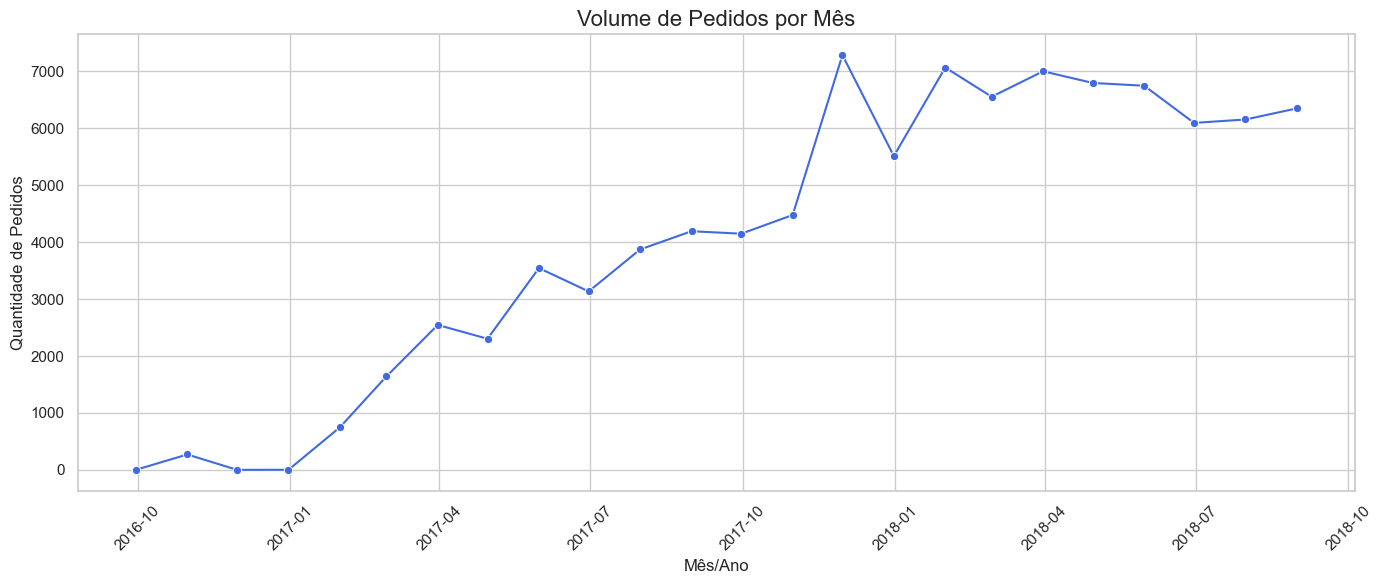

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna de data para datetime
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])

# Agrupar pedidos por mês
pedidos_mensais = df_pedidos.set_index('order_purchase_timestamp').resample('M').order_id.count()

#Gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(x=pedidos_mensais.index, y=pedidos_mensais.values, marker='o', color='royalblue')

plt.title('Volume de Pedidos por Mês', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Quantidade de Pedidos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




* Distribuição Do Tempo de Entrega

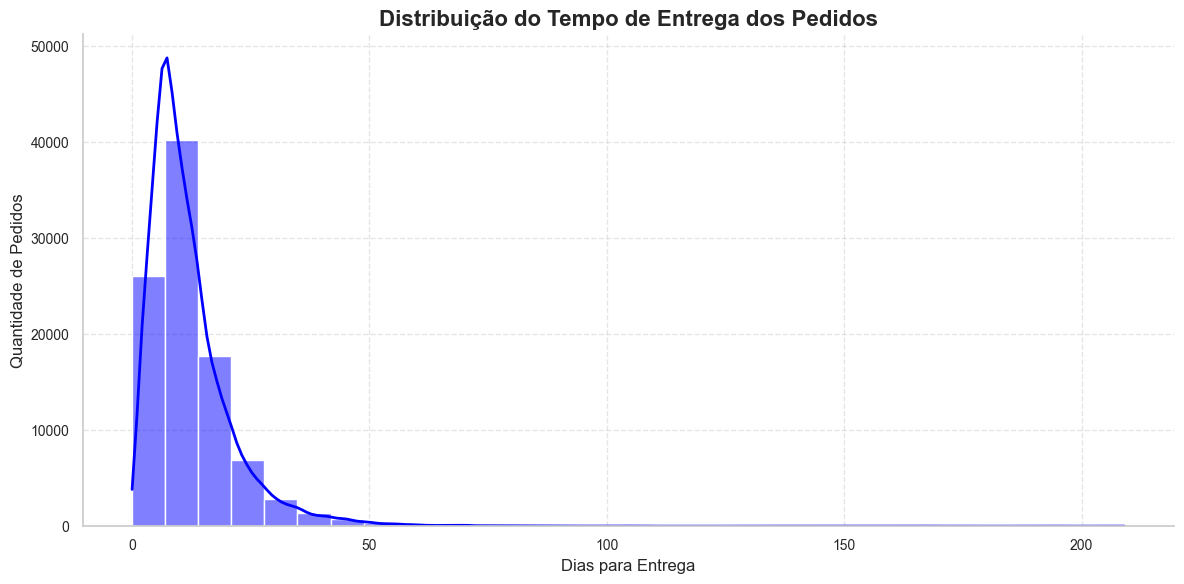

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversão de datas
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])

# Cálculo do tempo de entrega
df_pedidos['tempo_entrega'] = (df_pedidos['order_delivered_customer_date'] - df_pedidos['order_purchase_timestamp']).dt.days

# Remover valores ausentes e negativos (entregas erradas ou não realizadas)
df_tempo_entrega = df_pedidos[(df_pedidos['tempo_entrega'].notnull()) & (df_pedidos['tempo_entrega'] >= 0)]

#Gráfico
plt.figure(figsize=(12, 6))

sns.histplot(
    df_tempo_entrega['tempo_entrega'],
    bins=30,
    kde=True,
    color='blue',
    line_kws={'color': 'blue', 'linewidth': 2}
)
plt.title('Distribuição do Tempo de Entrega dos Pedidos', fontsize=16, fontweight='bold')
plt.xlabel('Dias para Entrega', fontsize=12)
plt.ylabel('Quantidade de Pedidos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


In [73]:
# Coverter a coluna de data para datetime

df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])

# Criar coluna 'delivery_time'
df_pedidos['delivery_time'] = (df_pedidos['order_delivered_customer_date'] - df_pedidos['order_purchase_timestamp']).dt.days

df_pedidos[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time']].head()


,order_id,order_purchase_timestamp,order_delivered_customer_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,8
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,13
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,9
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,13
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2


In [74]:
#Investigar outliers em entregas com tempo muito alto;

# Ver os maiores tempos de entrega
outliers = df_pedidos[df_pedidos['delivery_time'] > df_pedidos['delivery_time'].quantile(0.95)]
print(f"Total de outliers (acima do 95º percentil): {outliers.shape[0]}")
display(outliers[['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time']].sort_values(by='delivery_time', ascending=False).head(10))


Total de outliers (acima do 95º percentil): 4552


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,delivery_time
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,2017-02-21 23:31:27,2017-09-19 14:36:39,209
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,2018-02-23 14:57:35,2018-09-19 23:24:07,208
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,2017-03-07 23:59:51,2017-09-19 15:12:50,195
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,2017-03-08 22:47:40,2017-09-19 14:00:04,194
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,2017-03-08 18:09:02,2017-09-19 14:33:17,194
38509,0f4519c5f1c541ddec9f21b3bddd533a,1a8a4a30dc296976717f44e7801fdeef,2017-03-09 13:26:57,2017-09-19 14:38:21,194
11399,47b40429ed8cce3aee9199792275433f,cb2caaaead400c97350c37a3fc536867,2018-01-03 09:44:01,2018-07-13 20:51:31,191
81401,2fe324febf907e3ea3f2aa9650869fa5,65b14237885b3972ebec28c0f7dd2220,2017-03-13 20:17:10,2017-09-19 17:00:07,189
54480,2d7561026d542c8dbd8f0daeadf67a43,8199345f57c6d1cbe9701f92481beb8d,2017-03-15 11:24:27,2017-09-19 14:38:18,188
68769,c27815f7e3dd0b926b58552628481575,f85e9ec0719b16dc4dd0edd438793553,2017-03-15 23:23:17,2017-09-19 17:14:25,187


In [75]:
#Limpar dados anômalos: Entregas com tempo negativo ou zero

anomalias = df_pedidos[df_pedidos['delivery_time'] <= 0]
print(f"Registros com tempo de entrega <= 0 dias: {anomalias.shape[0]}")
display(anomalias[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time']].head())

# Remover os registros anômalos (se for o caso)
df_pedidos_limpo = df_pedidos[df_pedidos['delivery_time'] > 0].copy()
print(f"Total de registros após limpeza: {df_pedidos_limpo.shape[0]}")


Registros com tempo de entrega <= 0 dias: 13


,order_id,order_purchase_timestamp,order_delivered_customer_date,delivery_time
395,38c1e3d4ed6a13cd0cf612d4c09766e9,2018-02-02 15:26:38,2018-02-03 15:05:56,0
735,d3ca7b82c922817b06e5ca21165c5ea2,2017-11-16 13:54:08,2017-11-17 13:49:40,0
31522,1d893dd7ca5f77ebf5f59f0d2017eee0,2017-06-19 08:19:45,2017-06-19 21:07:52,0
37753,21a8ffca665bc7a1087d31751a7b7cbc,2017-05-31 12:00:35,2017-06-01 10:28:24,0
38792,f3c6775ba3d2d9fe2826f93b71f12008,2017-07-04 11:37:47,2017-07-05 08:09:26,0


Total de registros após limpeza: 96448


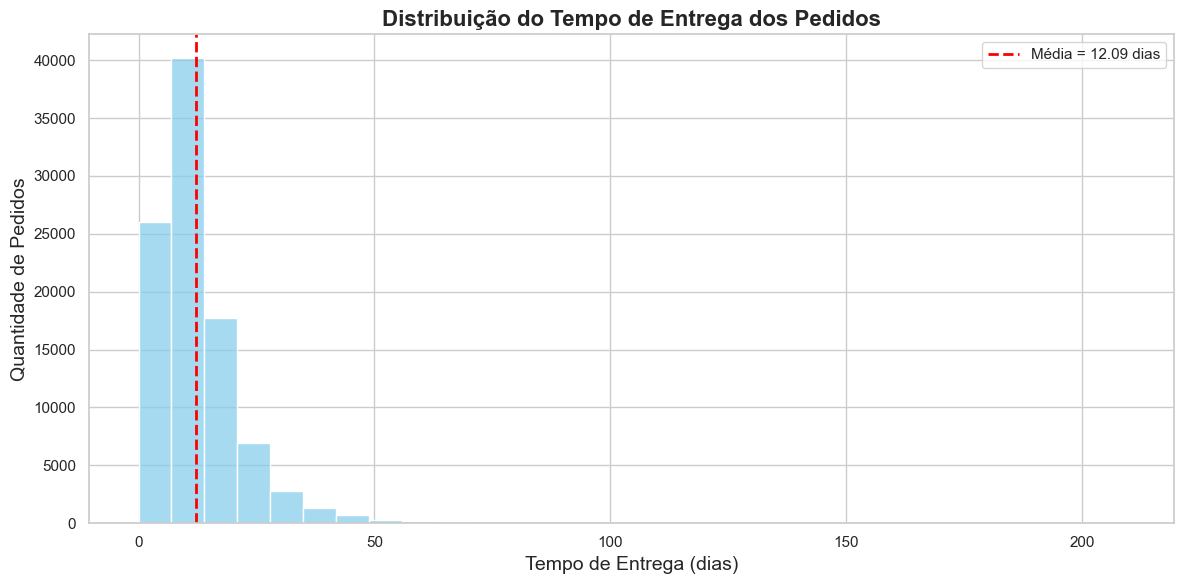

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo do seaborn
sns.set(style='whitegrid')

# Cria o gráfico
plt.figure(figsize=(12,6))
sns.histplot(df_pedidos['delivery_time'].dropna(), bins=30, kde=False, color='skyblue')

# Adiciona linha vertical média em vermelho
mean_delivery = df_pedidos['delivery_time'].mean()
plt.axvline(mean_delivery, color='red', linestyle='--', linewidth=2, label=f'Média = {mean_delivery:.2f} dias')

# Títulos e legendas
plt.title('Distribuição do Tempo de Entrega dos Pedidos', fontsize=16, weight='bold')
plt.xlabel('Tempo de Entrega (dias)', fontsize=14)
plt.ylabel('Quantidade de Pedidos', fontsize=14)
plt.legend()
plt.tight_layout()

plt.show()



* Frete vs Distância:

In [77]:
# 1. Padronizar os CEPs para string com 5 dígitos (zero à esquerda)
df_clientes['customer_zip_code_prefix'] = df_clientes['customer_zip_code_prefix'].astype(str).str.zfill(5)
df_geolocalizacao['geolocation_zip_code_prefix'] = df_geolocalizacao['geolocation_zip_code_prefix'].astype(str).str.zfill(5)

# 2. Fazer o merge juntando a geolocalização com os clientes
df_clientes_geo = df_clientes.merge(
    df_geolocalizacao,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
).rename(columns={
    'geolocation_lat': 'customer_lat',
    'geolocation_lng': 'customer_lng'
})

# 3. Conferir quais clientes ficaram sem latitude/longitude (NaN)
clientes_sem_geo = df_clientes_geo[df_clientes_geo['customer_lat'].isna()]
print(f"Clientes sem geolocalização (quantidade): {len(clientes_sem_geo)}")

# 4. Preencher os NaN com valores padrão (exemplo: 0)
df_clientes_geo['customer_lat'] = df_clientes_geo['customer_lat'].fillna(0)
df_clientes_geo['customer_lng'] = df_clientes_geo['customer_lng'].fillna(0)




Clientes sem geolocalização (quantidade): 278


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular distância haversine entre lat/lon em km ---
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em km
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Tamanho da amostra para testes 
amostra_size = 500  # ajuste conforme minha máquina suporta

# Pega amostra de cada dataframe 
df_itens_pedido_sample = df_itens_pedido.head(amostra_size)
df_pedidos_sample = df_pedidos[['order_id', 'customer_id']].head(amostra_size)
df_clientes_geo_sample = df_clientes_geo.head(amostra_size)
df_vendedores_geo_sample = df_vendedores_geo.head(amostra_size)

# 1. Juntar itens de pedido com pedidos para pegar customer_id
df_merge = df_itens_pedido_sample.merge(
    df_pedidos_sample,
    on='order_id',
    how='left'
)

# 2. Juntar localização dos clientes
df_merge = df_merge.merge(
    df_clientes_geo_sample[['customer_id', 'customer_lat', 'customer_lng']],
    on='customer_id',
    how='left'
)

# 3. Juntar localização dos vendedores 
df_merge = df_merge.merge(
    df_vendedores_geo_sample[['seller_id', 'seller_lat', 'seller_lng']],
    on='seller_id',
    how='left'
)

# 4. Calcular distância entre cliente e vendedor 
df_merge['distancia_km'] = haversine_np(
    df_merge['customer_lat'].values,
    df_merge['customer_lng'].values,
    df_merge['seller_lat'].values,
    df_merge['seller_lng'].values
)


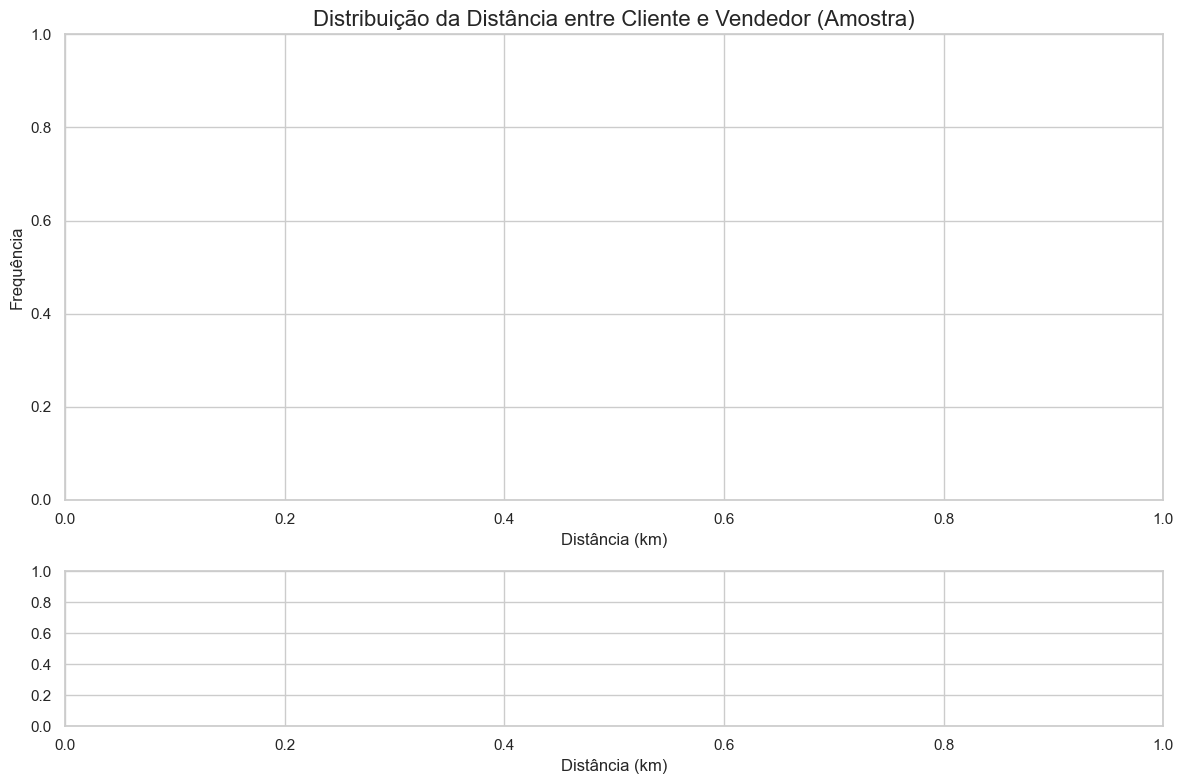

In [79]:
#gráfico

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove valores ausentes e infinitos antes de plotar
distancias_validas = df_merge['distancia_km'].replace([np.inf, -np.inf], np.nan).dropna()

# Estilo do gráfico
sns.set(style="whitegrid")

# Figura com dois subgráficos
fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={"height_ratios": [3, 1]})

# Histograma com curva de densidade
sns.histplot(distancias_validas, bins=30, kde=True, ax=ax[0], color='mediumpurple')
ax[0].set_title('Distribuição da Distância entre Cliente e Vendedor (Amostra)', fontsize=16)
ax[0].set_xlabel('Distância (km)', fontsize=12)
ax[0].set_ylabel('Frequência', fontsize=12)

# Boxplot limpo
sns.boxplot(x=distancias_validas, ax=ax[1], color='plum')
ax[1].set_xlabel('Distância (km)', fontsize=12)

plt.tight_layout()
plt.show()


* Categorias mais vendidas por faturamento:

In [80]:
# Formata a tabela para visualização bonita
styled_table = (
    faturamento_por_categoria
    .head(10)  # top 10
    .style
    .set_caption("Top 10 Categorias por Faturamento")
    .format({'faturamento': 'R$ {:,.2f}'})  # formato de moeda
    .background_gradient(subset=['faturamento'], cmap='Greens')  # destaque por cor
    .hide(axis='index')  # oculta índice
)

styled_table


product_category_name,faturamento
cama_mesa_banho,"R$ 5,602.00"
informatica_acessorios,"R$ 5,220.57"
relogios_presentes,"R$ 4,372.42"
beleza_saude,"R$ 4,149.77"
moveis_decoracao,"R$ 4,017.51"
esporte_lazer,"R$ 3,231.31"
ferramentas_jardim,"R$ 2,673.98"
perfumaria,"R$ 2,507.85"
brinquedos,"R$ 2,360.96"
automotivo,"R$ 2,169.56"


* Estado com maior valor médio de pedido

In [81]:
# 1. Merge dos itens com pedidos e clientes
df_pedidos_completo = df_itens_pedido.merge(df_pedidos[['order_id', 'customer_id']], on='order_id', how='left')
df_pedidos_completo = df_pedidos_completo.merge(df_clientes[['customer_id', 'customer_state']], on='customer_id', how='left')

# 2. Soma o valor total por pedido
valor_total_por_pedido = df_pedidos_completo.groupby(['order_id', 'customer_state'])['price'].sum().reset_index()

# 3. Calcula valor médio de pedido por estado
valor_medio_por_estado = valor_total_por_pedido.groupby('customer_state')['price'].mean().reset_index()
valor_medio_por_estado.columns = ['Estado', 'Valor Médio do Pedido']

# 4. Ordena para ver o estado com maior valor médio
valor_medio_por_estado_ordenado = valor_medio_por_estado.sort_values(by='Valor Médio do Pedido', ascending=False)

# 5. Exibe tabela formatada
valor_medio_por_estado_ordenado.style\
    .set_caption("Valor Médio de Pedido por Estado")\
    .format({'Valor Médio do Pedido': 'R$ {:,.2f}'})\
    .background_gradient(subset=['Valor Médio do Pedido'], cmap='Oranges')\
    .hide(axis='index')


Estado,Valor Médio do Pedido
PB,R$ 217.77
AP,R$ 199.62
AC,R$ 199.14
AL,R$ 198.63
RO,R$ 187.99
PA,R$ 184.43
PI,R$ 177.99
TO,R$ 176.65
RN,R$ 173.22
RR,R$ 172.13


C:\Users\priscilamaiel\AppData\Local\Temp\ipykernel_14540\2212492684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


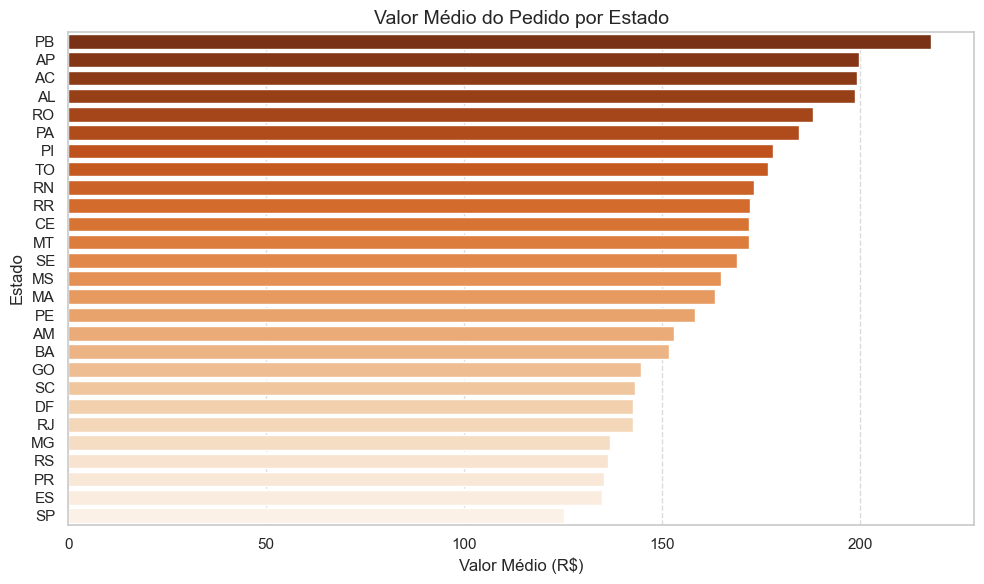

In [82]:
#Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(
    data=valor_medio_por_estado_ordenado,
    y='Estado',
    x='Valor Médio do Pedido',
    palette='Oranges_r'
)

plt.title('Valor Médio do Pedido por Estado', fontsize=14)
plt.xlabel('Valor Médio (R$)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 3º Passo:

#### Solução de Problemas de Negócio 

* Análise de Retenção:

In [83]:


# Contar número de pedidos por cliente
pedidos_por_cliente = df_pedidos_completo.groupby('customer_id')['order_id'].nunique().reset_index()
pedidos_por_cliente.columns = ['customer_id', 'num_pedidos']

# Classificar clientes
clientes_recorrentes = pedidos_por_cliente[pedidos_por_cliente['num_pedidos'] > 1]
clientes_unicos = pedidos_por_cliente[pedidos_por_cliente['num_pedidos'] == 1]

# Calcular taxa de retenção
total_clientes = pedidos_por_cliente.shape[0]
num_recorrentes = clientes_recorrentes.shape[0]
taxa_retencao = (num_recorrentes / total_clientes) * 100

print(f"Taxa de clientes recorrentes: {taxa_retencao:.2f}%")


Taxa de clientes recorrentes: 0.00%


In [84]:
# Verificar quantos clientes têm mais de um pedido
pedidos_por_cliente = df_pedidos.groupby('customer_id')['order_id'].nunique().reset_index()
pedidos_por_cliente.columns = ['customer_id', 'num_pedidos']

# Quantidade de clientes com mais de 1 pedido
clientes_recorrentes = pedidos_por_cliente[pedidos_por_cliente['num_pedidos'] > 1]
print(f"Número de clientes recorrentes: {clientes_recorrentes.shape[0]}")

# Verificar o número máximo de pedidos por cliente
print(f"Número máximo de pedidos por um cliente: {pedidos_por_cliente['num_pedidos'].max()}")

# Visualizar os 10 primeiros
pedidos_por_cliente.sort_values('num_pedidos', ascending=False).head(10)


Número de clientes recorrentes: 0
Número máximo de pedidos por um cliente: 1


,customer_id,num_pedidos
96460,ffffa3172527f765de70084a7e53aae8,1
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
5,0004164d20a9e969af783496f3408652,1
6,000419c5494106c306a97b5635748086,1
7,00046a560d407e99b969756e0b10f282,1
8,00050bf6e01e69d5c0fd612f1bcfb69c,1


In [85]:
num_clientes = df_pedidos['customer_id'].nunique()
num_pedidos = df_pedidos['order_id'].nunique()

print(f"Número total de clientes: {num_clientes}")
print(f"Número total de pedidos: {num_pedidos}")

Número total de clientes: 96461
Número total de pedidos: 96461


In [86]:
print(df_pedidos['customer_id'].head(10))
print(df_pedidos['customer_id'].nunique())
print(len(df_pedidos['customer_id']))  # Total de linhas


0     9ef432eb6251297304e76186b10a928d
1     b0830fb4747a6c6d20dea0b8c802d7ef
2     41ce2a54c0b03bf3443c3d931a367089
3     f88197465ea7920adcdbec7375364d82
4     8ab97904e6daea8866dbdbc4fb7aad2c
5     503740e9ca751ccdda7ba28e9ab8f608
7     9bdf08b4b3b52b5526ff42d37d47f222
8     f54a9f0e6b351c431402b8461ea51999
9     31ad1d1b63eb9962463f764d4e6e0c9d
10    494dded5b201313c64ed7f100595b95c
Name: customer_id, dtype: object
96461
96461


In [87]:
print(df_pedidos['order_purchase_timestamp'].min())
print(df_pedidos['order_purchase_timestamp'].max())


2016-09-15 12:16:38
2018-08-29 15:00:37


In [88]:
# Visualizar as primeiras linhas para confirmar colunas
print(df_pedidos.head())
print(df_revisoes_pedidos.head())
print(df_pagamentos.head())

# Juntando as tabelas em um só dataframe
df_merge = df_pedidos.merge(
    df_revisoes_pedidos[['order_id', 'review_score']], 
    on='order_id', 
    how='left'
)

df_merge = df_merge.merge(
    df_pagamentos[['order_id', 'payment_value', 'payment_type']],
    on='order_id',
    how='left'
)

print(df_merge.head())



                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [89]:

df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])

# 1. Criar dataframe de pedidos únicos (um pedido por linha)
pedidos_unicos = df_merge[['order_id', 'customer_id', 'order_purchase_timestamp']].drop_duplicates()

# 2. Total de clientes únicos
total_clientes = pedidos_unicos['customer_id'].nunique()

# 3. Quantos clientes compraram mais de uma vez
pedidos_por_cliente = pedidos_unicos.groupby('customer_id')['order_id'].nunique()
clientes_recorrentes = pedidos_por_cliente[pedidos_por_cliente > 1].count()

# 4. Taxa de retenção geral
taxa_retentao = (clientes_recorrentes / total_clientes) * 100

print(f"Total de clientes únicos: {total_clientes}")
print(f"Número de clientes que compraram mais de uma vez: {clientes_recorrentes}")
print(f"Taxa de retenção geral: {taxa_retentao:.2f}%")

# 5. Retenção ano a ano
pedidos_unicos['ano_pedido'] = pedidos_unicos['order_purchase_timestamp'].dt.year

anos = sorted(pedidos_unicos['ano_pedido'].unique())
clientes_por_ano = {}

for ano in anos:
    clientes_por_ano[ano] = set(pedidos_unicos.loc[pedidos_unicos['ano_pedido'] == ano, 'customer_id'].unique())

print("\nTaxa de retenção ano a ano:")
for i in range(len(anos) - 1):
    ano_atual = anos[i]
    ano_seguinte = anos[i + 1]

    clientes_ano_atual = clientes_por_ano[ano_atual]
    clientes_ano_seguinte = clientes_por_ano[ano_seguinte]

    clientes_retidos = clientes_ano_atual.intersection(clientes_ano_seguinte)

    if len(clientes_ano_atual) > 0:
        taxa_ano = (len(clientes_retidos) / len(clientes_ano_atual)) * 100
    else:
        taxa_ano = 0

    print(f"De {ano_atual} para {ano_seguinte}: {taxa_ano:.2f}% de retenção ({len(clientes_retidos)} clientes)")


Total de clientes únicos: 96461
Número de clientes que compraram mais de uma vez: 0
Taxa de retenção geral: 0.00%

Taxa de retenção ano a ano:
De 2016 para 2017: 0.00% de retenção (0 clientes)
De 2017 para 2018: 0.00% de retenção (0 clientes)


* Predição de Atraso:

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# 1. Carregar dados e converter colunas de datas
df_pedidos = pd.read_csv('./dados/pedidos.csv')

df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos['order_estimated_delivery_date'] = pd.to_datetime(df_pedidos['order_estimated_delivery_date'])

# 2. Criar variável alvo "atrasado"
df_pedidos['atrasado'] = (df_pedidos['order_delivered_customer_date'] > df_pedidos['order_estimated_delivery_date']).astype(int)

# 3. Criar features simples para o modelo
# Por exemplo: dias entre pedido e entrega estimada, dias entre pedido e entrega real
df_pedidos['tempo_estimado'] = (df_pedidos['order_estimated_delivery_date'] - df_pedidos['order_purchase_timestamp']).dt.days
df_pedidos['tempo_real'] = (df_pedidos['order_delivered_customer_date'] - df_pedidos['order_purchase_timestamp']).dt.days

# Como às vezes pode ter valores negativos ou nulos, vamos preencher com a média
df_pedidos['tempo_estimado'].fillna(df_pedidos['tempo_estimado'].mean(), inplace=True)
df_pedidos['tempo_real'].fillna(df_pedidos['tempo_real'].mean(), inplace=True)

# 4. Selecionar variáveis para modelo
X = df_pedidos[['tempo_estimado', 'tempo_real']]
y = df_pedidos['atrasado']

# 5. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Treinar modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Fazer previsões
y_pred = model.predict(X_test)

# 8. Avaliar modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9922568967251031

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     27514
           1       0.96      0.94      0.95      2319

    accuracy                           0.99     29833
   macro avg       0.98      0.97      0.97     29833
weighted avg       0.99      0.99      0.99     29833


Confusion Matrix:
 [[27429    85]
 [  146  2173]]


C:\Users\priscilamaiel\AppData\Local\Temp\ipykernel_14540\3047630892.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pedidos['tempo_estimado'].fillna(df_pedidos['tempo_estimado'].mean(), inplace=True)
C:\Users\priscilamaiel\AppData\Local\Temp\ipykernel_14540\3047630892.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar dados (supondo que já foi feito)
# df_pedidos = pd.read_csv('./dados/pedidos.csv')

# Converter datas
datas = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for d in datas:
    df_pedidos[d] = pd.to_datetime(df_pedidos[d], errors='coerce')

# Definir variável alvo 'atrasado'
df_pedidos['atrasado'] = (df_pedidos['order_delivered_customer_date'] > df_pedidos['order_estimated_delivery_date']).astype(int)

# Criar features temporais
df_pedidos['tempo_aprovacao'] = (df_pedidos['order_approved_at'] - df_pedidos['order_purchase_timestamp']).dt.total_seconds() / 3600  # horas
df_pedidos['tempo_transporte'] = (df_pedidos['order_delivered_carrier_date'] - df_pedidos['order_approved_at']).dt.total_seconds() / 3600  # horas
df_pedidos['tempo_previsto'] = (df_pedidos['order_estimated_delivery_date'] - df_pedidos['order_purchase_timestamp']).dt.total_seconds() / 3600  # horas
df_pedidos['dia_semana'] = df_pedidos['order_purchase_timestamp'].dt.dayofweek  # 0=Segunda, 6=Domingo
df_pedidos['mes'] = df_pedidos['order_purchase_timestamp'].dt.month

# Tratar valores faltantes (ex: se faltar datas em algumas linhas)
df_pedidos['tempo_aprovacao'] = df_pedidos['tempo_aprovacao'].fillna(df_pedidos['tempo_aprovacao'].median())
df_pedidos['tempo_transporte'] = df_pedidos['tempo_transporte'].fillna(df_pedidos['tempo_transporte'].median())
df_pedidos['tempo_previsto'] = df_pedidos['tempo_previsto'].fillna(df_pedidos['tempo_previsto'].median())
df_pedidos['dia_semana'] = df_pedidos['dia_semana'].fillna(df_pedidos['dia_semana'].mode()[0])
df_pedidos['mes'] = df_pedidos['mes'].fillna(df_pedidos['mes'].mode()[0])

# Selecionar features para o modelo
features = ['tempo_aprovacao', 'tempo_transporte', 'tempo_previsto', 'dia_semana', 'mes']
X = df_pedidos[features]
y = df_pedidos['atrasado']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Criar e treinar modelo simples - Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prever no teste
y_pred = model.predict(X_test)

# Avaliar desempenho
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9248483223276238

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     27485
           1       0.80      0.06      0.11      2348

    accuracy                           0.92     29833
   macro avg       0.87      0.53      0.54     29833
weighted avg       0.92      0.92      0.89     29833


Confusion Matrix:
 [[27451    34]
 [ 2208   140]]


* Segmentação de Clientes:

In [106]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df_clientes = pd.read_csv("./dados/clientes.csv")
df_pedidos = pd.read_csv("./dados/pedidos.csv")

# Converter datas para datetime
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])

# Criar features agregadas por cliente
df_agg = df_pedidos.groupby('customer_id').agg(
    total_pedidos=('order_id', 'count'),
    primeira_compra=('order_purchase_timestamp', 'min'),
    ultima_compra=('order_purchase_timestamp', 'max')
).reset_index()

# Calcular recência em dias (quanto tempo desde última compra até hoje)
import datetime
hoje = pd.to_datetime('today')
df_agg['recencia'] = (hoje - df_agg['ultima_compra']).dt.days

# Calcular frequência (dias entre primeira e última compra dividido pelo total de pedidos)
df_agg['frequencia'] = ((df_agg['ultima_compra'] - df_agg['primeira_compra']).dt.days / df_agg['total_pedidos']).fillna(0)

# Junte outras informações importantes do df_clientes (exemplo: estado, cidade, faixa_etaria se tiver)
df_agg = df_agg.merge(df_clientes[['customer_id']], on='customer_id', how='left')

# Selecionar features para o clustering
features = ['total_pedidos', 'recencia', 'frequencia']

X = df_agg[features]

# Padronizar as features para KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


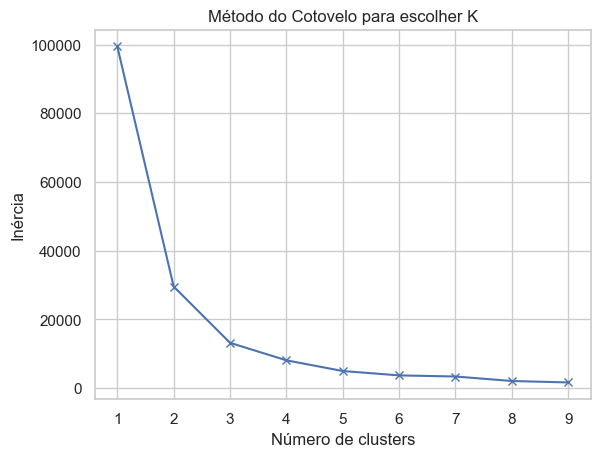

In [107]:
# Método do cotovelo para escolher número ideal de clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para escolher K')
plt.show()


* Análise de Satisfação:

In [121]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Supondo que já tenha o df_model pronto com as colunas relevantes
# df_model = pd.DataFrame com colunas ['review_score', 'product_category_name', 'tempo_real', 'payment_value']

# 2. Variáveis independentes (X) e dependente (y)
X = df_model[['product_category_name', 'tempo_real', 'payment_value']]
y = df_model['review_score']

# 3. Codificar variável categórica
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[['product_category_name']])

# 4. Juntar colunas numéricas com as codificadas
import numpy as np
X_num = X[['tempo_real', 'payment_value']].values
X_final = np.hstack([X_cat, X_num])

# 5. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# 6. Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Fazer previsões
y_pred = model.predict(X_test)

# 8. Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

# 9. Coeficientes para interpretar impacto das variáveis
feature_names = list(encoder.get_feature_names_out(['product_category_name'])) + ['tempo_real', 'payment_value']
coef = model.coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(coef_df)


Mean Squared Error: 2.1989
R2 Score: 0.0518
                                              Feature  Coefficient
18            product_category_name_cds_dvds_musicais     1.508345
57                          product_category_name_pcs     1.216416
64     product_category_name_tablets_impressao_imagem     0.987448
60  product_category_name_portateis_casa_forno_e_cafe     0.965508
23  product_category_name_construcao_ferramentas_f...     0.894897
..                                                ...          ...
40                       product_category_name_flores    -1.022975
5            product_category_name_artes_e_artesanato    -1.178594
49                 product_category_name_market_place    -1.279524
16              product_category_name_casa_conforto_2    -2.015284
28                 product_category_name_dvds_blu_ray    -3.029427

[70 rows x 2 columns]


##### 4º Passo:

* Um dashboard geral que mostre a evolução das vendas ao longo do tempo, com filtros por estado e categoria de produto


* Um mapa de calor mostrando a concentração de vendas por região/estado do Brasil

* Um conjunto de gráficos que apresente a relação entre avaliação do cliente e tempo de entrega

* Um dashboard de análise dos vendedores, mostrando quais têm melhor desempenho em termos de volume de vendas, satisfação do cliente e tempo de entrega


In [ ]:
# Importação de bibliotecas
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import sqlite3

# ============================================
# 1. CARREGAMENTO E TRATAMENTO DOS DADOS 
# ============================================

# Criando dados de exemplo com estrutura consistente
n_records = 1000  # Número fixo de registros

# Tabela de pedidos
orders_data = {
    "order_id": range(1, n_records+1),
    "customer_id": range(1000, 1000+n_records),
    "order_purchase_timestamp": pd.date_range(start="2016-01-01", periods=n_records, freq="D"),
    "order_delivered_customer_date": pd.date_range(start="2016-01-05", periods=n_records, freq="D")
}

# Tabela de itens de pedido (com preço e avaliação)
order_items_data = {
    "order_id": range(1, n_records+1),
    "product_id": range(5000, 5000+n_records),
    "price": [100, 200, 50, 30, 20] * (n_records // 5),
    "review_score": [5, 4, 3, 2, 1] * (n_records // 5)
}

# Tabela de produtos
products_data = {
    "product_id": range(5000, 5000+n_records),
    "product_category_name": ["eletronicos", "moveis", "beleza", "livros", "alimentos"] * (n_records // 5)
}

# Tabela de clientes
customers_data = {
    "customer_id": range(1000, 1000+n_records),
    "customer_state": ["SP", "RJ", "MG", "RS", "PR"] * (n_records // 5)
}

# Criando DataFrames
df_orders = pd.DataFrame(orders_data)
df_order_items = pd.DataFrame(order_items_data)
df_products = pd.DataFrame(products_data)
df_customers = pd.DataFrame(customers_data)

# Conexão com banco de dados SQLite em memória
conn = sqlite3.connect(":memory:")

# Escrevendo tabelas no banco de dados
df_orders.to_sql("orders", conn, if_exists="replace", index=False)
df_order_items.to_sql("order_items", conn, if_exists="replace", index=False)
df_products.to_sql("products", conn, if_exists="replace", index=False)
df_customers.to_sql("customers", conn, if_exists="replace", index=False)

# Query corrigida (usando os nomes de colunas corretos)
query = """
SELECT 
    date(o.order_purchase_timestamp) as data_pedido,
    c.customer_state as estado,
    p.product_category_name as categoria,
    SUM(oi.price) as receita_total,
    COUNT(DISTINCT o.order_id) as total_pedidos,
    AVG(oi.review_score) as avaliacao_media,
    AVG(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp)) as tempo_entrega_dias
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY 1, 2, 3
"""

df_consolidado = pd.read_sql(query, conn)

# ============================================
# 2. LAYOUT DO DASHBOARD
# ============================================

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("📊 Dashboard de Vendas - Olist E-commerce", style={'textAlign': 'center'}),
    
    html.Div([
        dcc.DatePickerRange(
            id='date-range',
            start_date=df_consolidado['data_pedido'].min(),
            end_date=df_consolidado['data_pedido'].max(),
            display_format='YYYY-MM-DD'
        ),
        dcc.Dropdown(
            id='state-dropdown',
            options=[{'label': state, 'value': state} for state in df_consolidado['estado'].unique()],
            multi=True,
            placeholder="Selecione estados..."
        ),
        dcc.Dropdown(
            id='category-dropdown',
            options=[{'label': cat, 'value': cat} for cat in df_consolidado['categoria'].unique()],
            multi=True,
            placeholder="Selecione categorias..."
        )
    ], style={'padding': '20px', 'backgroundColor': '#f9f9f9'}),
    
    html.Div([
        html.Div(id='total-sales', className='kpi-card'),
        html.Div(id='total-orders', className='kpi-card'),
        html.Div(id='avg-review', className='kpi-card'),
        html.Div(id='avg-delivery', className='kpi-card')
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'margin': '20px 0'}),
    
    dcc.Graph(id='sales-trend'),
    dcc.Graph(id='sales-map'),
    dcc.Graph(id='top-categories'),
    dcc.Graph(id='delivery-review-scatter')
])

# ============================================
# 3. CALLBACKS
# ============================================

@app.callback(
    [Output('total-sales', 'children'),
     Output('total-orders', 'children'),
     Output('avg-review', 'children'),
     Output('avg-delivery', 'children'),
     Output('sales-trend', 'figure'),
     Output('sales-map', 'figure'),
     Output('top-categories', 'figure'),
     Output('delivery-review-scatter', 'figure')],
    [Input('date-range', 'start_date'),
     Input('date-range', 'end_date'),
     Input('state-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def update_dashboard(start_date, end_date, selected_states, selected_categories):
    filtered_df = df_consolidado.copy()
    filtered_df = filtered_df[
        (filtered_df['data_pedido'] >= start_date) & 
        (filtered_df['data_pedido'] <= end_date)
    ]
    
    if selected_states:
        filtered_df = filtered_df[filtered_df['estado'].isin(selected_states)]
    if selected_categories:
        filtered_df = filtered_df[filtered_df['categoria'].isin(selected_categories)]
    
    total_sales = filtered_df['receita_total'].sum()
    total_orders = filtered_df['total_pedidos'].sum()
    avg_review = filtered_df['avaliacao_media'].mean()
    avg_delivery = filtered_df['tempo_entrega_dias'].mean()
    
    trend_fig = px.line(
        filtered_df.groupby('data_pedido').agg({'receita_total': 'sum'}).reset_index(),
        x='data_pedido',
        y='receita_total',
        title='📈 Evolução Mensal de Vendas'
    )
    
    state_sales = filtered_df.groupby('estado').agg({'receita_total': 'sum'}).reset_index()
    map_fig = px.choropleth(
        state_sales,
        locations='estado',
        locationmode='ISO-3',
        color='receita_total',
        scope='south america',
        title='🗺️ Vendas por Estado (Brasil)'
    )
    
    top_categories = filtered_df.groupby('categoria').agg({'receita_total': 'sum'}).nlargest(5, 'receita_total')
    top_cat_fig = px.bar(
        top_categories,
        x='receita_total',
        y=top_categories.index,
        orientation='h',
        title='🏆 Top 5 Categorias por Receita'
    )
    
    scatter_fig = px.scatter(
        filtered_df,
        x='tempo_entrega_dias',
        y='avaliacao_media',
        color='categoria',
        title='🚚 Tempo de Entrega vs Avaliação do Cliente'
    )
    
    return (
        f"💰 Receita Total: R${total_sales:,.2f}",
        f"📦 Total de Pedidos: {total_orders:,}",
        f"⭐ Avaliação Média: {avg_review:.1f}/5",
        f"⏱️ Entrega Média: {avg_delivery:.1f} dias",
        trend_fig, map_fig, top_cat_fig, scatter_fig
    )

# ============================================
# 4. EXECUÇÃO
# ============================================

if __name__ == '__main__':
    app.run(debug=True)

##### O Dash substituiu o método antigo app.run_server() pelo mais simples app.run(). Para rodar seu dashboard localmente, basta usar app.run(debug=True) em vez de app.run_server(debug=True). Essa mudança visa simplificar a API, mantendo a mesma funcionalidade de iniciar o servidor e ativar o modo de debug.


 * Para Executar: 

1- Execute o código.

2- Acesse http://127.0.0.1:8050/ no navegador.

3- Interaja com os filtros para explorar os dados.